# **Training Part of the model :**
## STEP 1 : - Importing kaggle into google colab  

In [ ]:
pip install kaggle

## STEP 2 : - Installing Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/kaggle.json

cp: missing destination file operand after '/content/kaggle.json'
Try 'cp --help' for more information.


In [ ]:
!kaggle datasets download -d

usage: kaggle datasets download [-h] [-f FILE_NAME] [-p PATH] [-w] [--unzip] [-o] [-q] [dataset]
kaggle datasets download: error: argument -d/--dataset: expected one argument


## STEP 3 : - Downloading The Dataset from Kaggle
##      Dataset :  Breast Histopathology Images

In [ ]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
100% 3.10G/3.10G [01:44<00:00, 32.9MB/s]
100% 3.10G/3.10G [01:44<00:00, 31.9MB/s]


## Importing Zipfile

In [ ]:
import zipfile

## Unzip The Dataset

In [ ]:
!unzip /content/breast-histopathology-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

## STEP 4 : - Importing The Necessary Packages

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


## STEP 5 : - Setting Path For The Dataset

In [ ]:
# Assuming data in folders is structured as 'data/train/Benign', 'data/train/Malignant', etc.
# "12932" folder contains balanced data(images) to some extent for training part .

data_dir = '/content/12932'

### STEP 6 : - Importing ImageDataGenerator to load image

In [ ]:
# Image data generator for loading and augmenting images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 591 images belonging to 2 classes.
Found 146 images belonging to 2 classes.


## STEP 7 : - Building The Model

In [ ]:
# Building The Model by Adding Necessary Layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),     #Adding Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),    # Adding MaxPooling Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),               # Adding Flatten Layer
    Dense(128, activation='relu'),     # Adding Dense Layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


## STEP 8 : - Compiling The Model

In [ ]:
#Compilimg The Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


## STEP 9 : - Training and Fitting The Model

In [ ]:
# Training and fitting the model , using Earlystopping to avoid model Overfitting

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5348 - loss: 0.7154 - val_accuracy: 0.5890 - val_loss: 0.6208
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6491 - loss: 0.5875 - val_accuracy: 0.6575 - val_loss: 0.6717
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6864 - loss: 0.6493 - val_accuracy: 0.8082 - val_loss: 0.4823
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8246 - loss: 0.4782 - val_accuracy: 0.8219 - val_loss: 0.4559
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8089 - loss: 0.4597 - val_accuracy: 0.8288 - val_loss: 0.4251
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8231 - loss: 0.4399 - val_accuracy: 0.5890 - val_loss: 0.8212
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7358 - loss: 0.6056 - val_accuracy: 0.8288 - val_loss: 0.3899
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8521 - loss: 0.3775 - val_accuracy: 0.8151 - val_loss: 0.4130
Epo

## STEP 10 : - Printing Accuracy Of The Model

In [ ]:
# Printing Accuracy
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.7654 - loss: 0.6577
Validation Accuracy: 80.14%


## STEP 11 : - Plotting Accuracy and Validation Loss of the Model

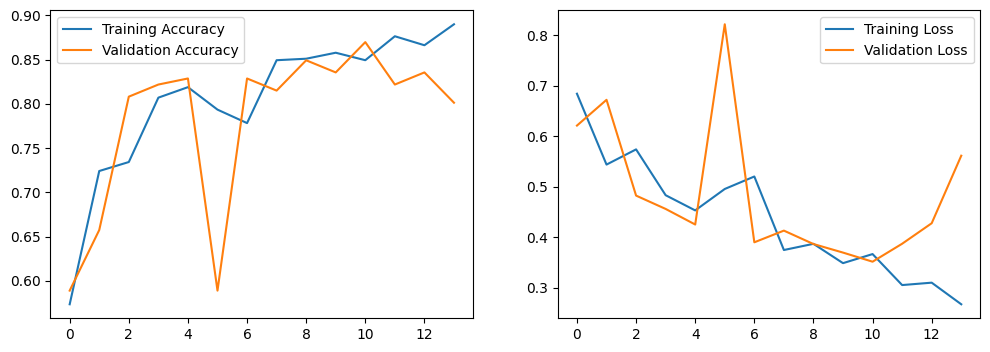

In [ ]:
# Plotting Accuracy and Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


## STEP 12 : - Saving The Model

In [ ]:
model.save("breastcancer.h5")


# **Testing Part Of The Model :**




## STEP 1 : - Importing The Necessary Packages

In [ ]:
# Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
from keras.layers import Flatten, Reshape

## STEP 2 : - Loading The Model

In [ ]:
# Loading the saved model as breastcancer.h5
model = load_model('breastcancer.h5')

## Specifying the path to the dataset

In [ ]:
 # Specifying the path to dataset
data_dir = '12932'
batch_size = 32
img_size = (128, 128)


## STEP 3 : - Prining Sample of Images Belonging to Benign and Malignant classes

In [ ]:
import os
print("Benign samples:", len(os.listdir('/content/12932/0')))
print("Malignant samples:", len(os.listdir('/content/12932/1')))

Benign samples: 433
Malignant samples: 304


## STEP 4 : - Preprocessing The Image

In [ ]:
# Preprocessing the Images
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    return "Malignant" if prediction > 0.5 else "Benign"


## STEP 5 : -  Making Predictions for the test Image Belonging to class 0

In [ ]:
# Making prediction for the test image for the class 0

# Path of image  is mentioned for prediction
print(predict_image('/content/12242/0/12242_idx5_x1001_y251_class0.png'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Benign


## STEP 6 : -  Making Predictions for the test Image Belonging to class 1

In [ ]:
# Making prediction for the test image for the class 1

# Path of image  is mentioned for prediction
print(predict_image('/content/12932/1/12932_idx5_x1001_y1251_class1.png'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Malignant


## STEP 7 : - Taking Any random Sample image from the Dataset To see whether the Model is predicting right or not

In [ ]:
# Setting the path and predicting the image class

print(predict_image('/content/12876/0/12876_idx5_x1201_y51_class0.png'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Benign


## Conclusion  :  THE MODEL IS TRAINED AND TESTED CORRECTLY AND PREDICTING RIGHT CLASSES OF IMAGES .
